In [1]:
#-*- coding: utf-8 -*-

import pandas as pd
import numpy as np
import matplotlib as plt
%matplotlib inline
import pprint

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
# next line disables full display
# pd.reset_option('^display.', silent=True)

# import numpy
# numpy.version.version

In [2]:
data = pd.read_csv('./data/Life Expectancy Data.csv')
data.head()

# Data from
# https://www.kaggle.com/kumarajarshi/life-expectancy-who

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [3]:
# Renaming columns

renamed = []
for col in data.columns:
    # removes leading and trailing spaces, as well as double space in "thinnes 1-19 years"
    cols = ' '.join(col.split())
    renamed.append(cols.replace(" ", "_").lower())
print(len(renamed), 'columns')
print(renamed)

data.columns = data.columns[:0].tolist() + renamed
print(data.shape)
data.head()

# https://stackoverflow.com/questions/2077897/substitute-multiple-whitespace-with-single-whitespace-in-python

22 columns
['country', 'year', 'status', 'life_expectancy', 'adult_mortality', 'infant_deaths', 'alcohol', 'percentage_expenditure', 'hepatitis_b', 'measles', 'bmi', 'under-five_deaths', 'polio', 'total_expenditure', 'diphtheria', 'hiv/aids', 'gdp', 'population', 'thinness_1-19_years', 'thinness_5-9_years', 'income_composition_of_resources', 'schooling']
(2938, 22)


,country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,under-five_deaths,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness_1-19_years,thinness_5-9_years,income_composition_of_resources,schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [4]:
# Check count of NaN values

data.isnull().sum()

country                              0
year                                 0
status                               0
life_expectancy                     10
adult_mortality                     10
infant_deaths                        0
alcohol                            194
percentage_expenditure               0
hepatitis_b                        553
measles                              0
bmi                                 34
under-five_deaths                    0
polio                               19
total_expenditure                  226
diphtheria                          19
hiv/aids                             0
gdp                                448
population                         652
thinness_1-19_years                 34
thinness_5-9_years                  34
income_composition_of_resources    167
schooling                          163
dtype: int64

In [5]:
# There are 10 NaN in life_expectancy. This is creating issues in the cell where I am using ColumnTransformer.
# Dropped these lines

data = data.dropna(subset=['life_expectancy'])
data.isnull().sum()

country                              0
year                                 0
status                               0
life_expectancy                      0
adult_mortality                      0
infant_deaths                        0
alcohol                            193
percentage_expenditure               0
hepatitis_b                        553
measles                              0
bmi                                 32
under-five_deaths                    0
polio                               19
total_expenditure                  226
diphtheria                          19
hiv/aids                             0
gdp                                443
population                         644
thinness_1-19_years                 32
thinness_5-9_years                  32
income_composition_of_resources    160
schooling                          160
dtype: int64

In [6]:
# Check zero values

def has_zeros(df):
    '''Check if column in dataframe contains zero values.'''
    import pprint
    
    #totals = []
    totals = {}
    for col in df.columns:
        sum_zero = (df[col] == 0).sum()
        totals[col] = sum_zero
    return totals
    
pprint.pprint(has_zeros(data))

# Not sure what to do with the zeros. It seems feasible to have 0 in some cases, like 0 cases of polio in a
# certain country or a certain year. But there are other features like 'percentage_expenditure' that seems to be
# just missing. Maybe these zeros can be imputed?

{'adult_mortality': 0,
 'alcohol': 0,
 'bmi': 0,
 'country': 0,
 'diphtheria': 0,
 'gdp': 0,
 'hepatitis_b': 0,
 'hiv/aids': 0,
 'income_composition_of_resources': 130,
 'infant_deaths': 838,
 'life_expectancy': 0,
 'measles': 973,
 'percentage_expenditure': 606,
 'polio': 0,
 'population': 0,
 'schooling': 26,
 'status': 0,
 'thinness_1-19_years': 0,
 'thinness_5-9_years': 0,
 'total_expenditure': 0,
 'under-five_deaths': 775,
 'year': 0}


In [7]:
# Convert year from int into object
# Per article, if columns are not "category" there should be no problem.

data['year'] = data['year'].astype(int).astype(object)
data.info()

# https://stackoverflow.com/questions/39173813/pandas-convert-dtype-object-to-int

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2928 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   country                          2928 non-null   object 
 1   year                             2928 non-null   object 
 2   status                           2928 non-null   object 
 3   life_expectancy                  2928 non-null   float64
 4   adult_mortality                  2928 non-null   float64
 5   infant_deaths                    2928 non-null   int64  
 6   alcohol                          2735 non-null   float64
 7   percentage_expenditure           2928 non-null   float64
 8   hepatitis_b                      2375 non-null   float64
 9   measles                          2928 non-null   int64  
 10  bmi                              2896 non-null   float64
 11  under-five_deaths                2928 non-null   int64  
 12  polio               

In [8]:
# Grouping by country with missing population.

country = data['population'].isna().groupby(data['country']).all()
no_pop = country[country].index.tolist()
print(len(no_pop))
print(no_pop)

40
['Antigua and Barbuda', 'Bahamas', 'Bahrain', 'Barbados', 'Bolivia (Plurinational State of)', 'Brunei Darussalam', 'Congo', 'Cuba', 'Czechia', "Côte d'Ivoire", "Democratic People's Republic of Korea", 'Democratic Republic of the Congo', 'Egypt', 'Gambia', 'Grenada', 'Iran (Islamic Republic of)', 'Kuwait', 'Kyrgyzstan', "Lao People's Democratic Republic", 'Libya', 'Micronesia (Federated States of)', 'New Zealand', 'Oman', 'Qatar', 'Republic of Korea', 'Republic of Moldova', 'Saint Lucia', 'Saint Vincent and the Grenadines', 'Saudi Arabia', 'Singapore', 'Slovakia', 'Somalia', 'The former Yugoslav republic of Macedonia', 'United Arab Emirates', 'United Kingdom of Great Britain and Northern Ireland', 'United Republic of Tanzania', 'United States of America', 'Venezuela (Bolivarian Republic of)', 'Viet Nam', 'Yemen']


<AxesSubplot:>

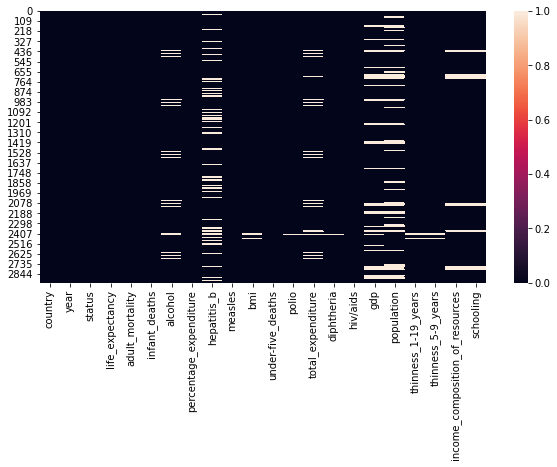

In [9]:
# Visualize missing values

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
sns.heatmap(data.isnull())

# https://www.kaggle.com/stefanost/regression-with-thousands-of-missing-values

In [10]:
corr_matr = data.corr()
corr_matr

# My concern is that there is missing population data for a lot of countries.
# However, population only correlates relatively strongly with infant_deaths(.556) and under-five_deaths (.544)

,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,under-five_deaths,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness_1-19_years,thinness_5-9_years,income_composition_of_resources,schooling
life_expectancy,1.000000,-0.696359,-0.196557,0.404877,0.381864,0.256762,-0.157586,0.567694,-0.222529,0.465556,0.218086,0.479495,-0.556556,0.461455,-0.021538,-0.477183,-0.471584,0.724776,0.751975
adult_mortality,-0.696359,1.000000,0.078756,-0.195848,-0.242860,-0.162476,0.031176,-0.387017,0.094146,-0.274823,-0.115281,-0.275131,0.523821,-0.296049,-0.013647,0.302904,0.308457,-0.457626,-0.454612
infant_deaths,-0.196557,0.078756,1.000000,-0.116647,-0.085906,-0.224750,0.501038,-0.227480,0.996628,-0.171063,-0.128826,-0.175539,0.024955,-0.108643,0.556781,0.465700,0.471340,-0.145018,-0.195202
alcohol,0.404877,-0.195848,-0.116647,1.000000,0.341112,0.086217,-0.052569,0.338253,-0.113388,0.222057,0.302902,0.222378,-0.049918,0.354406,-0.035376,-0.432302,-0.420862,0.450254,0.548001
percentage_expenditure,0.381864,-0.242860,-0.085906,0.341112,1.000000,0.016704,-0.056831,0.231130,-0.088152,0.147664,0.176245,0.144022,-0.098230,0.899370,-0.025716,-0.252397,-0.253931,0.382244,0.391466
hepatitis_b,0.256762,-0.162476,-0.224750,0.086217,0.016704,1.000000,-0.121211,0.155174,-0.234353,0.483989,0.070983,0.610199,-0.113395,0.083918,-0.123834,-0.122479,-0.127039,0.199141,0.222895
measles,-0.157586,0.031176,0.501038,-0.052569,-0.056831,-0.121211,1.000000,-0.176069,0.507718,-0.136460,-0.106405,-0.142174,0.030673,-0.076646,0.265936,0.224579,0.220836,-0.129465,-0.138344
bmi,0.567694,-0.387017,-0.227480,0.338253,0.231130,0.155174,-0.176069,1.000000,-0.237910,0.287579,0.238765,0.286077,-0.243735,0.304442,-0.072051,-0.530805,-0.537784,0.509299,0.558363
under-five_deaths,-0.222529,0.094146,0.996628,-0.113388,-0.088152,-0.234353,0.507718,-0.237910,1.000000,-0.189137,-0.130355,-0.196083,0.037783,-0.112302,0.544401,0.467771,0.472244,-0.163185,-0.210945
polio,0.465556,-0.274823,-0.171063,0.222057,0.147664,0.483989,-0.136460,0.287579,-0.189137,1.000000,0.144150,0.672130,-0.159914,0.212368,-0.038833,-0.222790,-0.223568,0.380835,0.416441


<AxesSubplot:>

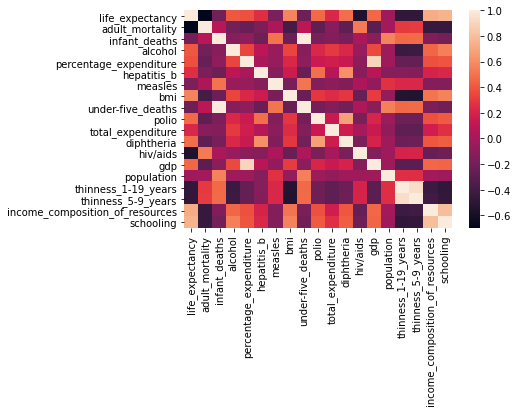

In [11]:
sns.heatmap(data.corr())

In [12]:
data[data['population'].isna()].tail(20)

,country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,under-five_deaths,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness_1-19_years,thinness_5-9_years,income_composition_of_resources,schooling
2886,Viet Nam,2003,Developing,74.0,137.0,30,2.19,0.0,78.0,2297,1.4,37,96.0,4.84,99.0,0.2,NaN,NaN,15.6,16.2,0.592,10.9
2887,Viet Nam,2002,Developing,73.8,137.0,30,2.03,0.0,NaN,6755,1.0,39,92.0,4.70,75.0,0.2,NaN,NaN,15.6,16.3,0.584,10.7
2888,Viet Nam,2001,Developing,73.6,138.0,32,1.84,0.0,NaN,12058,9.6,41,96.0,5.17,96.0,0.1,NaN,NaN,15.7,16.4,0.576,10.6
2889,Viet Nam,2000,Developing,73.4,139.0,33,1.60,0.0,NaN,16512,9.2,43,96.0,4.89,96.0,0.1,NaN,NaN,15.8,16.4,0.569,10.4
2890,Yemen,2015,Developing,65.7,224.0,37,NaN,0.0,69.0,468,41.3,47,63.0,NaN,69.0,0.1,NaN,NaN,13.6,13.4,0.499,9.0
2891,Yemen,2014,Developing,65.4,228.0,37,0.01,0.0,73.0,815,4.4,47,67.0,5.64,73.0,0.1,NaN,NaN,13.7,13.5,0.500,9.0
2892,Yemen,2013,Developing,65.4,226.0,36,0.04,0.0,73.0,400,39.6,46,67.0,5.78,73.0,0.1,NaN,NaN,13.7,13.5,0.498,9.0
2893,Yemen,2012,Developing,64.7,236.0,36,0.04,0.0,67.0,2177,38.7,46,68.0,5.73,67.0,0.1,NaN,NaN,13.7,13.6,0.494,9.0
2894,Yemen,2011,Developing,64.6,234.0,35,0.04,0.0,69.0,2676,37.9,45,69.0,5.40,69.0,0.1,NaN,NaN,13.7,13.6,0.493,8.6
2895,Yemen,2010,Developing,64.4,233.0,35,0.06,0.0,76.0,510,37.2,45,77.0,5.17,76.0,0.1,NaN,NaN,13.7,13.7,0.488,8.5


In [13]:
data[data['country'] == 'Yemen']

,country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,under-five_deaths,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness_1-19_years,thinness_5-9_years,income_composition_of_resources,schooling
2890,Yemen,2015,Developing,65.7,224.0,37,NaN,0.0,69.0,468,41.3,47,63.0,NaN,69.0,0.1,NaN,NaN,13.6,13.4,0.499,9.0
2891,Yemen,2014,Developing,65.4,228.0,37,0.01,0.0,73.0,815,4.4,47,67.0,5.64,73.0,0.1,NaN,NaN,13.7,13.5,0.500,9.0
2892,Yemen,2013,Developing,65.4,226.0,36,0.04,0.0,73.0,400,39.6,46,67.0,5.78,73.0,0.1,NaN,NaN,13.7,13.5,0.498,9.0
2893,Yemen,2012,Developing,64.7,236.0,36,0.04,0.0,67.0,2177,38.7,46,68.0,5.73,67.0,0.1,NaN,NaN,13.7,13.6,0.494,9.0
2894,Yemen,2011,Developing,64.6,234.0,35,0.04,0.0,69.0,2676,37.9,45,69.0,5.40,69.0,0.1,NaN,NaN,13.7,13.6,0.493,8.6
2895,Yemen,2010,Developing,64.4,233.0,35,0.06,0.0,76.0,510,37.2,45,77.0,5.17,76.0,0.1,NaN,NaN,13.7,13.7,0.488,8.5
2896,Yemen,2009,Developing,64.1,235.0,36,0.03,0.0,76.0,130,36.4,46,76.0,5.32,76.0,0.1,NaN,NaN,13.8,13.7,0.483,8.4
2897,Yemen,2008,Developing,63.8,238.0,37,0.04,0.0,78.0,7,35.7,47,78.0,5.12,78.0,0.1,NaN,NaN,13.8,13.7,0.480,8.5
2898,Yemen,2007,Developing,63.4,24.0,38,0.05,0.0,79.0,13,35.1,49,79.0,4.92,79.0,0.1,NaN,NaN,13.8,13.8,0.477,8.6
2899,Yemen,2006,Developing,63.0,242.0,39,0.04,0.0,78.0,8079,34.5,51,78.0,4.82,78.0,0.1,NaN,NaN,13.9,13.8,0.475,8.7


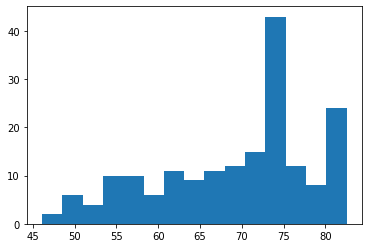

In [14]:
# Histogram of mean life_expectancy grouped by country

country_mean = data.groupby('country')['life_expectancy'].mean()
plt.hist(country_mean, bins=15)
plt.show()

In [15]:
# plt.scatter(data['bmi'], data['adult_mortality'])
# plt.show()

In [16]:
# pair_plot = sns.pairplot(data, height=5)

In [39]:
# Trying to use pipline with ColumnTransformer in order to transform data in specific columns.
# That implies OneHotEncoding for the three categorical columns. 
# And SimpleImpute to the rest of numerical columns.
# Will end up with more than 200 columns.

from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from numpy import nan



df = data.copy()

# Replace 0 with NaN
# So that these columns can be imputed with the ColumnTransformer instead of accounting for those zeros.
# For other columns it's OK to have zeros.
df[['percentage_expenditure', 'income_composition_of_resources', 'schooling']] = df[['percentage_expenditure', 'income_composition_of_resources', 'schooling']].replace(0, nan)
# print(df.info())
#pprint.pprint(has_zeros(df1))

# Split dataframe into input and output variables.
x = df.iloc[:,df.columns != 'life_expectancy']
# print(type(x))
y = df.iloc[:, 3] # life_expectancy is the output column (variable)
# print(type(y))


In [40]:
x.isnull().sum()

country                              0
year                                 0
status                               0
adult_mortality                      0
infant_deaths                        0
alcohol                            193
percentage_expenditure             606
hepatitis_b                        553
measles                              0
bmi                                 32
under-five_deaths                    0
polio                               19
total_expenditure                  226
diphtheria                          19
hiv/aids                             0
gdp                                443
population                         644
thinness_1-19_years                 32
thinness_5-9_years                  32
income_composition_of_resources    290
schooling                          186
dtype: int64

In [59]:
# Split into train and test datasets.
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=40)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
# print(X_train.info)


# Build transformers OnHotEncoder and SimpleImputer for categorical and numeric columns respectively.
categorical_features = ['country', 'year', 'status']


numerical_features = ['alcohol', 'percentage_expenditure', 'hepatitis_b', 'bmi', 
                      'polio', 'total_expenditure', 'diphtheria', 'gdp', 'population',
                      'thinness_1-19_years', 'thinness_5-9_years', 'income_composition_of_resources',
                      'schooling'
                      ]

transformers = [
    ('onehot', OneHotEncoder(), categorical_features),
    ('impute', SimpleImputer(strategy='median'), numerical_features)
]

# Should I do the transformation before splitting the dataset, and avoid pipeline?
column_transformer = ColumnTransformer(transformers, remainder='passthrough')


X_train_transformed = column_transformer.fit_transform(X_train)
column_transformer.named_transformers_['onehot'].get_feature_names()
#print(X_train_transformed)


lr = LinearRegression()
pipe = Pipeline([
    ('preprocessing', column_transformer),
    ('lr', lr)
])
pipe.fit(X_train, y_train)
#pipe.predict(X_test)

print('R-squared: ', pipe.score(X_test, y_test))



# https://scikit-learn.org/stable/modules/compose.html#pipeline
# https://machinelearningmastery.com/columntransformer-for-numerical-and-categorical-data/
# https://towardsdatascience.com/using-columntransformer-to-combine-data-processing-steps-af383f7d5260

(2196, 21) (732, 21) (2196,) (732,)
R-squared:  0.7977148464886165
